# Money == Happiness: A Qualitative Examination of Wilkie Collins' The Moonstone

## Tom Cohen

16 December 2020

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

#### imports & tools

In [3]:
# Import all your libraries here. 
import pandas as pd
import nltk
import collections
import numpy as np
import spacy
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
import re
%matplotlib inline

In [4]:
sentimentAnalyzer = SentimentIntensityAnalyzer()
stemmer = nltk.stem.lancaster.LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.RegexpTokenizer(r"\w+")
sentiment = lambda x: sentimentAnalyzer.polarity_scores(x)['compound']

#### important functions

In [5]:
def sentiment(text): 
    score = sentimentAnalyzer.polarity_scores(text)['compound']
    return score

In [6]:
def cleanAndSimplify(text: str) -> str:
    '''
    Cleans a string roughly from punctuations and lowercases it
    '''
    copy = text.lower()
    copy = copy.replace('\n', ' ')
    copy = copy.replace('*', '')
    copy = copy.replace('\xa0', '')
    copy = copy.replace(';','.')
    copy = copy.replace('?!','.')
    copy = copy.replace('!!','.')
    copy = copy.replace('!','.')
    copy = copy.replace('?','.')
    return copy

In [7]:
def plot(data):
    '''
    input: an array-type object (np.array or list) of results 
    output: plots the data along the story, marking the transitions between the narrators.
    
    '''
    if type(data) != pd.core.frame.Series:
        df = pd.Series(data)
    else:
        df = data
    plt.figure(figsize=(18,12))
    plt.plot(df, 'bo')
    plt.ylim(df[6:].min(), df[6:].max()) # set the boundaries of the plot by min and max values, starting First Period.
    plt.vlines(x = [6], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'red', ls = '--', lw = 2, label = 'Betteredge')
    plt.vlines(x = [31], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'pink', ls = '--', lw = 2, label = 'Clack')
    plt.vlines(x = [40], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'orange', ls = '--', lw = 2, label = 'Bruff')
    plt.vlines(x = [43], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'purple', ls = '--', lw = 2, label = 'Blake')
    plt.vlines(x = [54], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'green', ls = '--', lw = 2, label = 'Jennings')
    plt.vlines(x = [55], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'purple', ls = '--', lw = 2, label = 'Blake')
    plt.vlines(x = [57], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'black', ls = '--', lw = 2, label = 'Cuff')
    plt.vlines(x = [63], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'brown', ls = '--', lw = 2, label = 'Candy')
    plt.vlines(x = [64], ymin = df[6:].min(), ymax = df[6:].max(), colors = 'red', ls = '--', lw = 2, label = 'Betteredge')
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    plt.show()

In [8]:
def extractMeans(data, label = None, ignore_zeros = True) -> pd.DataFrame:
    '''
    input:
        - data: an array-type object
        - label (default = None): a label to be attached to the outputted DataFrame  (e.g., "Money", "Superficiality", etc.)
        - ignore_zeros (default = True): whether or not to include values of zero in the calculation of the mean.
        
    output: a pandas DataFrame, containing the mean values of each narrator period in the book. 
    '''
    data = np.array(data)
    names = list(dictionary.keys())
    ranges = [range(6,29), range(31,39), range(40,43), list(set(range(44,57))-{54}), range(54,55), range(57,63), range(63,64)]
    
    if ignore_zeros:
        means = {names[i]: np.array([x for x in data[ranges[i]] if x > 0.0]).mean() for i in range(len(names))}
    
    else:
        means = {names[i]: np.array(data[ranges[i]]).mean() for i in range(len(names))}
        
    df = pd.DataFrame.from_dict(means, orient = 'index')
    
    if label:
        df.columns = [label]
    
    else:
        df.columns = ['Mean']
    
    return df

### loading *The Moonstone*, dividing it into parts, and associating those parts with narrators:

In [9]:
moonstone = open('../Readings/content/texts/moonstone.md').read()
chapters = moonstone.split("##")
names = ["Betteredge", "Clack", "Bruff", "Blake","Jennings","Cuff", "Candy"]
narrators = [ chapters[5:29] + [chapters[64]], chapters[31:39], chapters[40:43], chapters[43:54] + chapters[55:57], chapters[54], chapters[57:63], chapters[63] ]
narrators = [''.join([part for part in text]) if type(text) is list else text for text in narrators]
dictionary = {name:text for name, text in zip(names, narrators)}

**"There are degrees in happiness, darling. We must have a little talk, some day, on that subject."** It is nowadays a common, research-backed convention that “money can’t buy happiness.” In the advancement of an egalitarian world, elements of happiness, such as the ability to form and pursue relationships, mental and physical wellbeing, and a sense of purpose are becoming increasingly more accessible to people of all socioeconomic backgrounds. But how does it translate into times when people’s extent of freedom has been entirely predetermined by their inborn rank, affluence, and societal status? into a world that celebrates inequality and *conditions* the right to love someone on consonant socioeconomic status? 

Often considered one of the founding fathers of the “detective-fever,” Willke Collins' 1868 epistolary novel, The Moonstone, offers a unique, comprehensive peek into the diversity of life during the 19th-century. The story is formed as a sequential collection of attestations made by different characters, altogether attempting to resolve the mysterious theft of a precious Indian diamond from a wealthy family, the Verinders. The plot is deeply inspired by the Victorian era in England (1837-1901) and severe economic disparities that characterized it. Curiously, the narrators and characters introduced represent all socioeconomic layers. Beyond providing plain recollections of events, they often invite the reader into their intimate worlds, their credos, their predispositions. Combined with Collins’ nuanced writing, they present multiple lenses through which we can explore - beyond the mystery itself - their sense of happiness and its relationship with their financial background.

In this project, I will analyze the relationship between money and happiness across The Moonstone. In this story, money spans a broader world than the sheer financial one; it strongly influences the characters’ assumptions and decision-making. Therefore, ‘money’ requires a more expansive definition and will serve as an overarching term for economic -, rank-based-, and materialistic-behaviors. Likewise, happiness and unhappiness are manifest in various forms and will be used to encapsulate positivity, optimism, and contentment, and the lack thereof, respectively. 
Choosing a top-down approach, I will first examine the birds-eye view of happiness and positivity versus sadness and negativity throughout the plot. The figure below shows a summation of two marginal plots: Sentiment, described by the ratio of positive to negative sentences (extracted using sentiment analysis; see Subfigure 1.1), and Happiness, describing the ratio of happy and optimistic words to sad and pessimistic words (extracted using word search; see Subfigure 1.2). For better orientation, milestones are added to the plot, marking the beginnings of each of the narratives. This plot will serve as a map for in-depth exploration of happiness and sadness throughout The Moonstone henceforth. 


### Happy & Optimistic vs. Sad & Pessimistic language

In [10]:
happy_vocab = ['happy', 'exuberant','glad','smile', 'fluky', 'fortuitous', 'fortune', 'lucky']
sad_vocab = ['sad', 'bitter','melancholy','moody','lethargy','gloomy','mur', 'bad', 'blue', 'brokenhearted', 'crestfallen', 'dejected', 'depressed', 'doleful', 'down', 'droopy', 'forlorn', 'gloomy', 'glum', 'heartbroken', 'inconsolable']

o = '''auspicious, light, bright, overcome, encouraging, heartening, hopeful, hope, likely, promising, propitious, cheering, comforting, reassuring, soothing, assured, confident, decisive, positive'''
optimistic_vocab = o.split(',')
p = '''bleak, dark, desperate, fail, discouraging, disheartening, dismal, dreary, hopeless, inauspicious, pessimistic, unlikely, unpromising,doubt'''
pessimistic_vocab = p.split(', ')

happy_vocab = [stemmer.stem(word) for word in happy_vocab]
sad_vocab = [stemmer.stem(word) for word in sad_vocab]
optimistic_vocab = [stemmer.stem(word) for word in optimistic_vocab]
pessimistic_vocab = [stemmer.stem(word) for word in pessimistic_vocab]

In [11]:
happy = []
sad = []
for chapter in chapters:
    
    tokens = [stemmer.stem(token) for token in tokenizer.tokenize(chapter)]

    happy_words, sad_words = 0, 0
    
    if len(tokens) < 200:
        happy.append(0.0)
        sad.append(0.0)
        continue
    
    l = len(tokens)
    
    for token in tokens:
        if token in happy_vocab:
            happy_words += 1
        elif token in optimistic_vocab:
            happy_words += 0.5
        elif token in sad_vocab:
            sad_words += 1
        elif token in pessimistic_vocab:
            sad_words += 0.5
            
    if happy_words > 0:
        happy.append(happy_words/l)
    
    else:
        happy.append(0.0)
        
    if sad_words > 0:
        sad.append(sad_words/l)
        
    else:
        sad.append(0.0)

happy = np.array(happy)
sad = np.array(sad)
happysad_ratio = [0.0 if (str(x) == 'nan' or str(x) == 'inf') else x for x in happy/sad]

/Users/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in true_divide


## Sentiment Analysis

In [13]:
sentiments_ratio = []

for chapter in chapters[0:]:
    
    sentences = cleanAndSimplify(chapter).split('.')
    positive = sum([1 for sent in sentences if sentiment(sent) > 0])
    negative = sum([1 for sent in sentences if sentiment(sent) < 0])
    
    if negative == 0:
        sentiments_ratio.append(0)
        
    else:
        sentiments_ratio.append(positive / (negative))

# plot(sentiments_ratio)

### Subplots

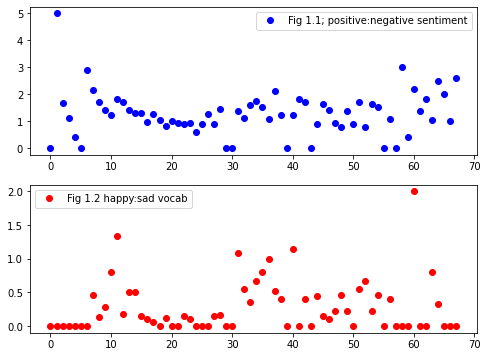

In [14]:
fig, ax = plt.subplots(2, figsize=(8,6))
ax[0].plot(pd.Series(sentiments_ratio), 'bo', label = 'Fig 1.1; positive:negative sentiment')
ax[1].plot(pd.Series(happysad_ratio), 'ro', label = 'Fig 1.2 happy:sad vocab')
ax[0]
ax[0].legend()
ax[1].legend()

## Figure 1

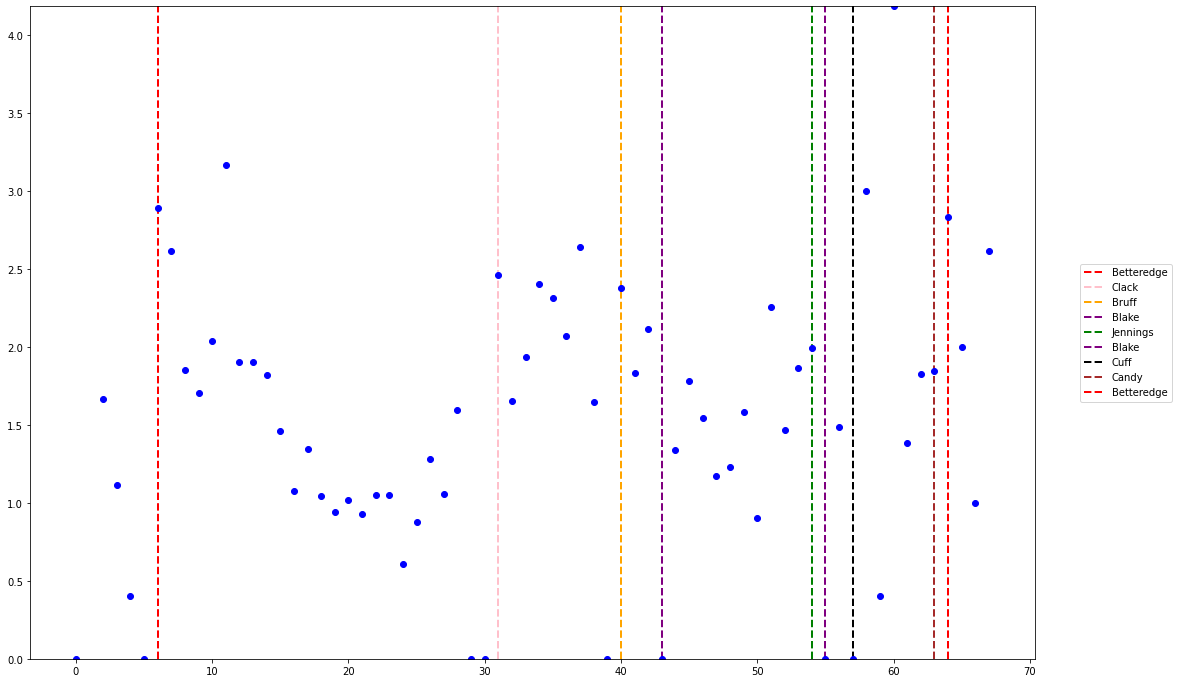

In [15]:
plot(np.array(sentiments_ratio) + happysad_ratio)

**"Economy - with a dash of love."** Very conspicuously, money serves as a common root for many of the relationships formed in the story. It could be intuitively hypothesize that money, in fact, creates more opportunities to find love - thus leading to a higher chance of attaining happiness. But a closer examination of the interaction between money and relationship opportunities reveals quite the opposite. One example of that is Betteredge’s failed marriage with his ex-wife, Selina Goby. Admittedly, his reason for marrying her was sheer economical. He says, “Selina, being a single woman, made me pay so much a week for her board and services. Selina, being my wife, couldn’t charge for her board, and would have to give me her services for nothing.” With this reasoning, he confesses to Lady Verinder that it would be “cheaper to marry her than to keep her,” and so he does. “Economy–with a dash of love,” he calls it. Of course, with such flimsy foundation, a “dash of love” was nowhere to be found. “We were not a happy couple, … always seemed to be getting, with the best of motives, in one another’s way,” Betteredge submits. And after five years, they inevitably separated. If anything, it seems that establishing a relationship based on money seems to forestall the potential for developing genuine love, as the purpose of the relationship has been predetermined and there is nothing beyond to strive for. 

Still, an argument can be made that those who belong to higher societal statuses are more sought-after and, thus, exposed to a larger pool of opportunities. However, it appears to be the case that money mainly confines one’s range of possibilities, so irreversibly blinding so one would overlook even the best of matches, standing right in front of them. Indeed, an imperative lesson could be learned from Franklin Blake and Rosanna Spearman. Despite Rosanna’s best efforts to conceal her all-consuming, unrequited love for Franklin - for she knows the irreconcilable “disparity” between them deems their relationship a “misalliace” - it is near impossible to miss. Yet, it seems mockable, unfathomable to both Franklin and Betteredge, two highly money-centered figures. When Penelope, Betteredge’s allegedly naive young daughter, reported her interpretation of the situation, he “laughed till the tears rolled down [his] cheeks” (Collins). During interactions between Franklin and Rosanna, he was dismissive and apathetic to her feelings, not allowing himself to see her as worthy to engage with in any form other than a housemade at his service. In a side-note Franklin attaches to his chapter, while narrating her letter, he writes: “The writer is entirely mistaken, poor creature. I never noticed her.” While it was in reference to him not noticing her on his way to the shrubbery, I believe he did not mistakenly choose the word “never.” He systematically overlooked the one person who loved him “with all [her] heart and soul,” who was willing to bury allegations that would have exposed him as the thief, without anything in return. He, indeed, “never noticed her.” Most disturbingly, after reading Rosanna’s letter to him and finding out the truth, Franklin remarks “I had read those portions of the miserable woman’s confession which related to myself, with unaffected surprise.” This unfortunate relationship can be a paralog of the restrictions imposed upon society when money is governing matters of the heart. In fact, it is evident that Rosanna, coming from a poor background, allowed herself to be vulnerable, to develop emotions albeit the fundamental difference between them, while Franklin, caged in the conventions of the Upper Class, could not see her. Nevertheless, it cannot be overlooked that for Franklin, the event resulted in minor momentary perturbation and an ultimate fulfillment of his love to Rachel, and for Rosanna it resulted in tragic death. So, while money appears to be a limitation, withholding people from pursuing “illegitimate” relationships that could have provided them eternal happiness, it also facilitates a supercillious sense of self-worth, enabling its possessor to proceed to a new relationship unscathed. In Franklin’s own (appalling) analogy to using a cigar: “You choose a woman, you try her, and she breaks your heart. Fool! take a lesson from your cigar-case. Throw her away, and try another!” Unsurprisingly, these philosophies are manifest in the following figure (Figure 2), relating mentionings of love-related words (multiplied by a factor of 5) and mentionings of money-related words, by narrator: 


In [17]:
money_words = '''money, cash, coin, debt, wealth, rich, gold, pay, expensive, poor, dime, pecuniary, possession, own, fund, superior, inferior, master, servant, peasant'''
money_words = money_words.split(', ')
money_words = [stemmer.stem(word) for word in money_words]

count_money = []

for chapter in chapters:
    tokens = tokenizer.tokenize(cleanAndSimplify(chapter))
    count = 0
    for token in tokens:
        if stemmer.stem(token) in money_words:
            count += 1
    
    count_money.append(count/len(tokens))

/Users/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app
/Users/tom/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:>

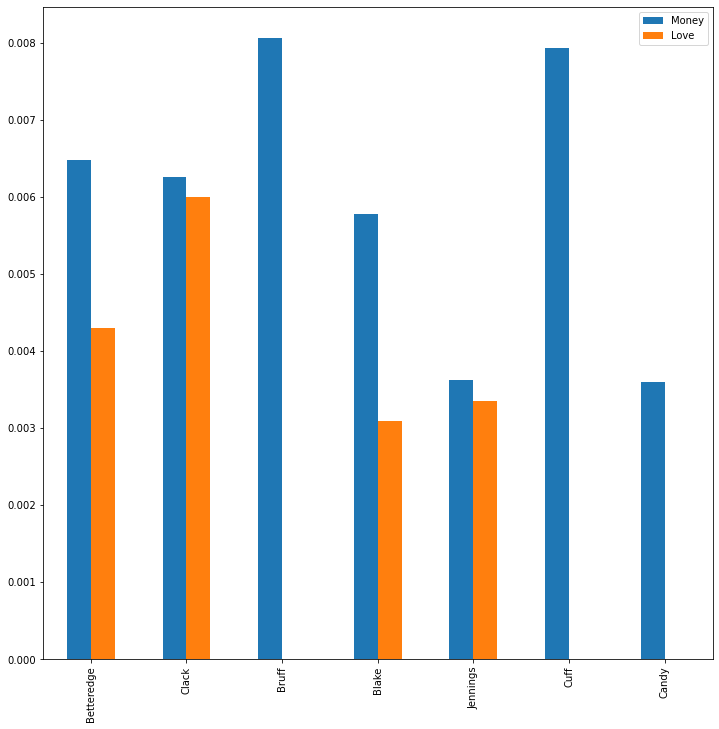

In [18]:
love = ['love', 'enamoured', 'infatuated', 'smitten']
love_stems = [stemmer.stem(word) for word in love]

love_count = []
for chapter in chapters:
    tokens = tokenizer.tokenize(cleanAndSimplify(chapter))
    count = 0
    for token in tokens:
        if stemmer.stem(token) in love_stems:
            count += 1
    
    love_count.append(count/len(tokens))
    
pd.concat((extractMeans(count_money, 'Money'), extractMeans(love_count, "Love")*5), axis = 1).plot(kind = 'bar', figsize = (12,12))

Notice how Blake seems to be as deprived of love as Ezra Jennings, and Ms. Clack is unexpectedly leading the herd. It can be explained by her supposedly-concealed love for Godfrey Ablewhite and for her religion.

**"A whiff of–you know what, and a turn at a certain book which I have had occasion to mention in these pages, composed me, body and mind."**. Given that having profound, long-lasting relationships has been widely-regarded as the leading predictor of longevity3, it begs us to explore whether money compensates in other areas of physical and mental well-being which influence one’s happiness. One could argue that, generally, money can be a means to alleviate stress and improve health, boding healthness and low anxiety to the Verinder family and its affiliates. However, holding exorbitant amounts of money and valuables could also be a source of hostility and immense stress. Since The Moonstone, as a whole, revolves around the loss of a precious, monetizable object from a wealthy, has-it-all family, it would be interesting to inspect anxiety and sickness against calmness and health, measured by appearances of variations of words such as anxious, ill, calm, and healthy. Appearances of money-related words, reduced by a factor of 3,are added to the graph, to unveil a potential relationship. Interestingly, Figure 3 suggests significantly higher levels of anxiety and sickness throughout the plot.

In [19]:
#Exploring the appearance of health- vs. sick-related words

healthy_vocab = '''healthy, health, vigor, able-bodied, fit, hale, hearty, robust, sound, well-conditioned, whole, wholesome, relaxed, calm, cool, peace, serene, soothed, soothing, relaxation, unfazed, calmed'''
sick_vocab = '''ailing, diseased, ill, sick, unfit, blue, unhealthy, unsound, unwell, down, ill, indisposed, sickened, anxious, anxiety, stressed, stress, worry, worried, jittery, nervous, perturbed'''

healthy_vocab = [word.strip() for word in healthy_vocab.split(',')]
sick_vocab = [word.strip() for word in sick_vocab.split(',')]

healthy_lemmas = [lemmatizer.lemmatize(word) for word in healthy_vocab]
sick_lemmas = [lemmatizer.lemmatize(word) for word in sick_vocab]

healthy = []
sick = []

for chapter in chapters:
    
    tokens = tokenizer.tokenize(chapter)
    healthy_count, sick_count = 0, 0
    
    l = len(tokens)
    if l < 200:
        healthy.append(0.0)
        sick.append(0.0)
        continue
        
    for token in tokens:
        if token in healthy_vocab or lemmatizer.lemmatize(token) in healthy_lemmas:
            healthy_count += 1
            
        elif token in sick_vocab or lemmatizer.lemmatize(token) in sick_lemmas:
            sick_count += 1
            
    healthy.append(healthy_count/l)
        
    sick.append(sick_count/l)
        

healthy = np.array(healthy)
sick = np.array(sick)

# healthysick_ratio = [0.0 if (str(y/x) == 'nan') else y if x == 0 else y/x for y in healthy for x in sick] # takes care of division by zero
# healthysick_ratio = [0.0 if (str(x) == 'inf') else x for x in healthy/sick]

/Users/tom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


<AxesSubplot:>

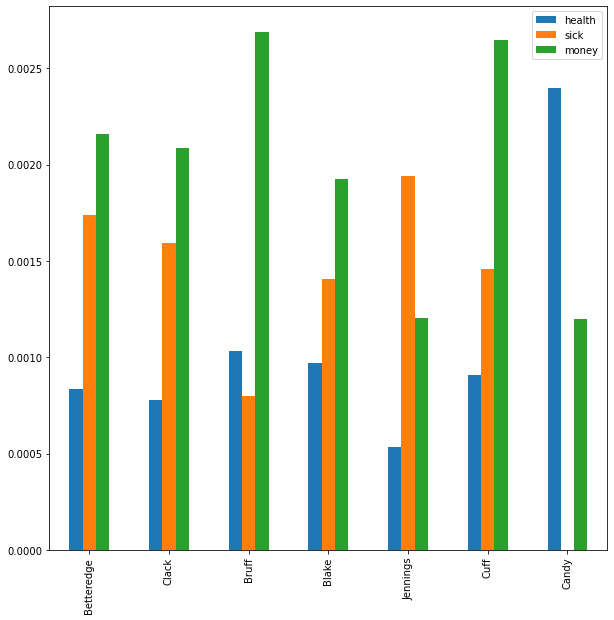

In [20]:
pd.concat((extractMeans(healthy, "health"),extractMeans(sick, "sick"), extractMeans(count_money, "money")/3), axis = 1).plot(kind = 'bar', figsize = (10,10))

One observation that could be extracted from the figure is the occasional close relationship between the money and physical or mental unhealthiness, as demonstrated in the columns of Betteredge, Ms. Clack, and Franklin Blake. Curiously, those characters are comparatively more concerned with money. Exceptions include Mr. Bruff and Cuff, who deal with money as part of their profession and hence would naturally have higher occurrences of money-related words, and Ezra Jennings, who, as exhibited, is a very melancholic character with little concern for money. 

Moreover, intersections of Figure 1 and Figure 3 can point at concrete segments and events in which happiness noticably changes due to a money-related matter. For example, a closer examination of the abrupt drop in happiness around the fifteenth chapter (see Figure 1), corresponds to the night of Rachel’s birthday and the subsequent loss of the diamond. Accordingly, Lady Verinder reports on Rachel: “The loss of her jewel seems almost to have turned her brain. Who would have thought that horrible Diamond could have laid such a hold on her in so short a time?”. Evidently, as corroborated by the figure, it seems to have affected not only Rachel but the overall positivity of all characters and to have had long-lasting effects. Whether this tremendous mental distress induced by the theft directly caused the following death of Julia Verinder remains obscure, but it is certainly plausible that such emotional turbulence has impinged on her life. It is worth mentioning, however, that, on average, the periods in which Bruff, Blake, Cuff, and Candy - figures of relatively high status - are characterized by slightly elevated measures of health and calmness, compared to the periods in which less fortunate characters narrated (e.g., Betteredge, Clack, and Jennings). So once again, we witness the equivocality of money as a predictor of one’s wellbeing and happiness.

**“We are all of us more or less unwilling to be brought into the world. And we are all of us right.”** Lastly, in such a diverse group, it is interesting to pair the characters’ sense of purpose in life, a key component in one’s happiness, and their financial background. It can, once again, be surmised that money, being an arguable measure of success, will play a role in one’s self-evaluation and sense of purpose - forecasting that the pursuit after money shall provide one a sense of meaning. On the other hand, according to the eminent Austrian psychiatrist, Viktor Frankl, a sense of purpose is derived from purposeful work, love, and courage in the face of adversity, which do not pertain to wealth (Frankl). Beautifully, all aforementioned sources of meaning are pursued in The Moonstone. 

Purposefulness through meaningful work is easily exhibited by Miss Clack. Ms. Clack, despite her garrulous and tactless nature, finds continued purposefulness in her overwhelming devotion to evangelism. She would not go anywhere without distributing her beloved tracts out of sheer faith that it will help in absolving the sins of their readers and bring them closer to god. Upon Lady Verinder’s mannered refusal to accept one of her tracts, Miss Clack writes , “I waited till the door was shut on me, and slipped the tract into the letter-box. When I had dropped another tract through the area railings, I felt relieved, in some small degree, of a heavy responsibility towards others.” Once again after her cab driver anxiously rejected her tract and attempted to flee, she “sowed the good seed, in spite of him, by throwing a second tract in at the window of the cab.” While one must perceive such behavior as arguably harassing, she wholeheartedly believes it is incumbent upon her to redeem her “fellow-sinners” of their sinful habits. While continuously reminding the reader of her tacit interest in money (which is sort of her double-standard), Clack is still among the lowest in terms of wealth, yet the beginning of her narration marks a maintained leap in positivity (refer to Figure 1).

On the other hand, Franklin’s sense of purpose is entirely encapsulated by his love to Rachel and has very little to do with his rank or possessions. It was so from the very beginning, as him and Rachel took pleasure in painting that door. Betteredge mentions, “That Mr. Franklin was in love [with Rachel], on his side, nobody who saw and heard him could doubt.” There seemed to be something pure and substantial about their relationship. Furthermore, since the disappearing of the diamond, which seperated them bitterly, all Franklin is trying to do is win her back desperately. In fact, it could be argued that the very reason why the mystery is resolved is his endless passion to appease Rachel in the first place. Once again, the sense of purpose is attributed to a non-materialistic pursuit.

Courage in the face of difficulty ought to be attributed to Ezra Jennings. Jennings has “suffered as few men suffer” and possesses “the melancholy view of life which led him to place the conditions of human happiness in complete oblivion of the past.” Living on opium to alleviate the pain which he endures daily, he finds little joy in his life. Indeed, as confirmed by Figure 2, sickness and pain have dominated his life. However, Jennings’ profound sense of purpose, the one which keeps him alive is his inherent courage to help others despite his miserable past. He demonstrated this in his inspiring fight for Mr. Candy’s life as he got ill, refusing to accept physicians ignorant advices and taking the matter into his own hands. “In my place [...] you would have remembered that Mr. Candy had taken you into his employment, under circumstances which made you his debtor for life... you would have risked anything,” he told Franklin. Subsequently, he devotes himself fully and wholeheartedly to restoring Franklin’s innocence. Incredibly humbled by his past life, he feels indebted for Franklin for showing him “the sunny side of human life.” After successfully proving his innocence he admits, “I have seen a little sunshine–I have had a happy time.” With this sublime sense of accomplishment, Ezra dies soon after. It is directly and unmistakably the sense of purpose, sponsored by his courage to improve others’ lives despite his own misery, that has given him even a drop of happiness and kept him alive.

**"I must lay down my pen for the present."** The brilliance of The Moonstone lays beneath the surface of the plot, between the lines, in the messages that are conveyed to the reader almost unbeknownst to them. And the message here is lucid. Happiness is not to be attained by pursuing diamonds, wealth, rank, or fame. It is rather found in the simplest of things: love and camaraderie, a healthy relationship with one’s body and mind, and a sense of purpose to guide one’s decisions. It applied 150 years ago, and even more so today, as luring materialistic pursuits become ever-present. Let Godfrey’s story be a lesson of what an obsessive superficial pursuit after money bodes, and let the rest attest to the simplicity that characterizes the attainment of the ultimate currency of life, true happiness.

### Citations

Collins, Wilkie, and Anthea Trodd. The Moonstone. Oxford [Oxfordshire: Oxford University 
Press, 1982. Print.

Frankl, Viktor E. (Viktor Emil), 1905-1997. Man's Search for Meaning; an Introduction to
Logotherapy. Boston :Beacon Press, 1962.



.

Thank you so much for a truly memorable seminar!

\- Tom